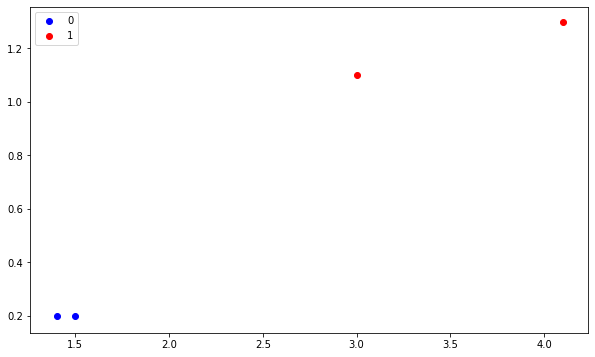

In [23]:
import numpy as np
import matplotlib.pyplot as plt

iris = np.genfromtxt('iris_demo.csv', dtype=None, delimiter=',', skip_header=1) 
X = iris[:, :2]
y = iris[:, 2]

plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend()

intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

In [24]:
def sigmoid_function(z):
    return 1 / (1 + np.exp(-z))

def loss_function(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

def predict(X, theta):    
    h = sigmoid_function(np.dot(X, theta))
    return h.round()


lr=0.01
num_iter=1


theta = np.array([0.1, 0.5, -0.1])
#theta = np.array([0.09729751,0.49756867,-0.0998046])

losses = []
accs   = []

for i in range(num_iter):
    print('data: ', X)
    print('theta: ', theta)
    
    z = np.dot(X, theta)
    print('z: ', z)
    y_hat = sigmoid_function(z)
    print('y_hat: ', y_hat)
    
    loss = loss_function(y_hat, y)
    print('loss: ', loss)

    # compute mean of gradient
    gradient = np.dot(X.T, (y_hat - y)) / y.size
    print('(y_hat - y): ', (y_hat - y))
    print('gradient: ', gradient)
    
    theta -= lr*gradient    
    print('new theta: ', theta)

    if(i % 1 == 0):
        # loss
        #print(f'loss: {loss} \t')
        losses.append(loss)
        
        # accuracy
        preds = predict(X, theta)
        acc = (preds == y).mean()
        #print(f'acc: {acc} \t')
        accs.append(acc)

data:  [[1.  1.4 0.2]
 [1.  1.5 0.2]
 [1.  3.  1.1]
 [1.  4.1 1.3]]
theta:  [ 0.1  0.5 -0.1]
z:  [0.78 0.83 1.49 2.02]
y_hat:  [0.68568011 0.69635493 0.81607827 0.88288101]
loss:  0.6692624273779996
(y_hat - y):  [ 0.68568011  0.69635493 -0.18392173 -0.11711899]
gradient:  [ 0.27024858  0.24313288 -0.01954039]
new theta:  [ 0.09729751  0.49756867 -0.0998046 ]


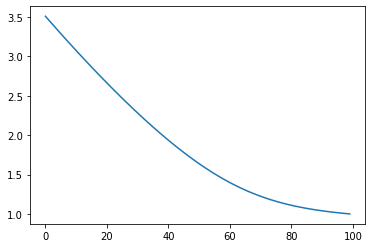

In [8]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.show()

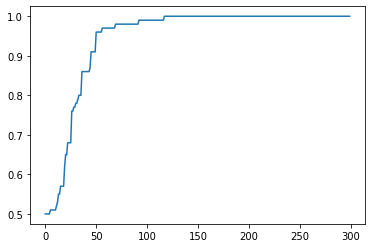

In [56]:
import matplotlib.pyplot as plt

plt.plot(accs)
plt.show()